In [6]:
import pandas as pd


df = pd.read_csv("brennan_johnson_grouped.csv")

df.drop('Unnamed: 0', axis=1, inplace=True)


print(df.shape)

print(df.dtypes)


(6, 44)
age                          int64
season                      object
games_played                 int64
starts                       int64
mins                         int64
goals                        int64
shots                        int64
shots_on_target              int64
shot_conversion_rate       float64
shots_on_target%           float64
assists                      int64
completed_passes%          float64
key_passes                   int64
key_passes_per90           float64
g+a                          int64
non_pens_goals               int64
pens                         int64
yellow_card                  int64
red_card                     int64
xg                         float64
npxg                       float64
xa                         float64
npxg+xa                    float64
progC                        int64
progP                        int64
progR                        int64
goals_per90                float64
assists_per90              float64
goals_and_as

In [7]:
df_grouped = df.groupby("season").sum(numeric_only=True)

df_grouped




,age,games_played,starts,mins,goals,shots,shots_on_target,shot_conversion_rate,shots_on_target%,assists,...,npxg_xa_per90,g+a_per90,takes_on_attemped,takes_on_succeeded,takes_on_succeeded%,assist_conversion_rate,fifa rating,player growth,league_rating,our_rating
season,,,,,,,,,,,,,,,,,,,,,
2019-2020,18,8,5,362,0,3,0,0.000000,0.000000,0,...,0.039779,0.000000,5,5,100.000000,0.000000,59.0,0.0,0.5,0.000000
2020-2021,19,42,40,3487,11,97,43,25.581395,44.329897,6,...,0.223209,0.438773,100,71,71.000000,1.366237,69.0,10.0,0.5,56.877298
2021-2022,20,50,48,4255,17,87,33,51.515152,37.931034,10,...,0.416686,0.571093,113,57,50.442478,1.063830,72.0,3.0,1.5,70.545433
2022-2023,21,44,37,3296,10,62,31,32.258065,50.000000,3,...,0.294903,0.354976,102,45,44.117647,0.652174,76.0,4.0,3.0,77.762478
2023-2024,22,38,28,2494,5,60,24,20.833333,40.000000,10,...,0.728949,0.541299,80,47,58.750000,1.030928,78.0,2.0,3.0,74.660942
2024-2025,23,33,23,2181,14,79,26,53.846154,32.911392,3,...,0.645805,0.701513,42,20,46.153846,0.833333,0.0,0.0,3.0,83.567888


In [8]:

print(df_grouped.describe())


             age  games_played     starts         mins      goals      shots  \
count   6.000000      6.000000   6.000000     6.000000   6.000000   6.000000   
mean   20.500000     35.833333  30.166667  2679.166667   9.500000  64.666667   
std     1.870829     14.784000  15.171245  1354.108329   6.156298  33.410577   
min    18.000000      8.000000   5.000000   362.000000   0.000000   3.000000   
25%    19.250000     34.250000  24.250000  2259.250000   6.250000  60.500000   
50%    20.500000     40.000000  32.500000  2895.000000  10.500000  70.500000   
75%    21.750000     43.500000  39.250000  3439.250000  13.250000  85.000000   
max    23.000000     50.000000  48.000000  4255.000000  17.000000  97.000000   

       shots_on_target  shot_conversion_rate  shots_on_target%    assists  \
count         6.000000              6.000000          6.000000   6.000000   
mean         26.166667             30.672350         34.195387   5.333333   
std          14.441837             20.186526    

['2019-2020' '2020-2021' '2021-2022' '2022-2023' '2023-2024' '2024-2025']


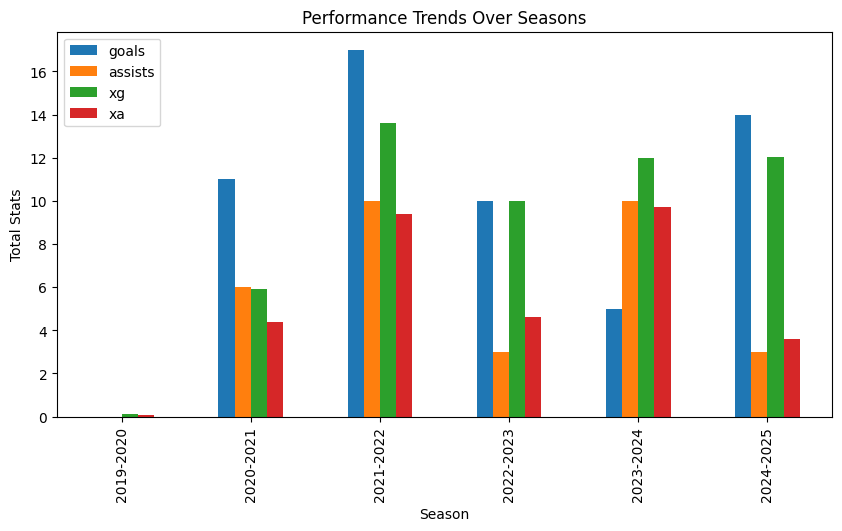

In [9]:
import matplotlib.pyplot as plt
print(df["season"].unique())

df_grouped1 = df.groupby("season")[["goals", "assists", "xg", "xa"]].sum()

df_grouped1.plot(kind="bar", figsize=(10,5))
plt.title("Performance Trends Over Seasons")
plt.xlabel("Season")
plt.ylabel("Total Stats")
plt.show()


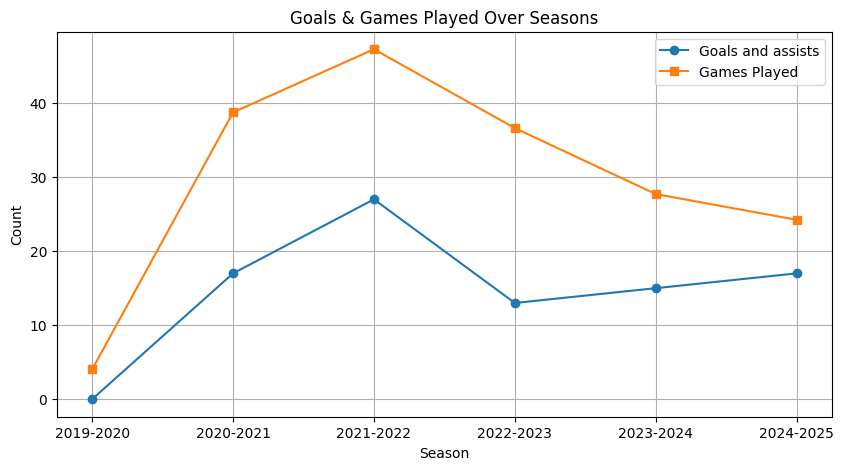

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index, df_grouped["g+a"], marker="o", label="Goals and assists")
plt.plot(df_grouped.index, df_grouped["mins"]/90, marker="s", label="Games Played")
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Goals & Games Played Over Seasons")
plt.legend()
plt.grid(True)
plt.show()

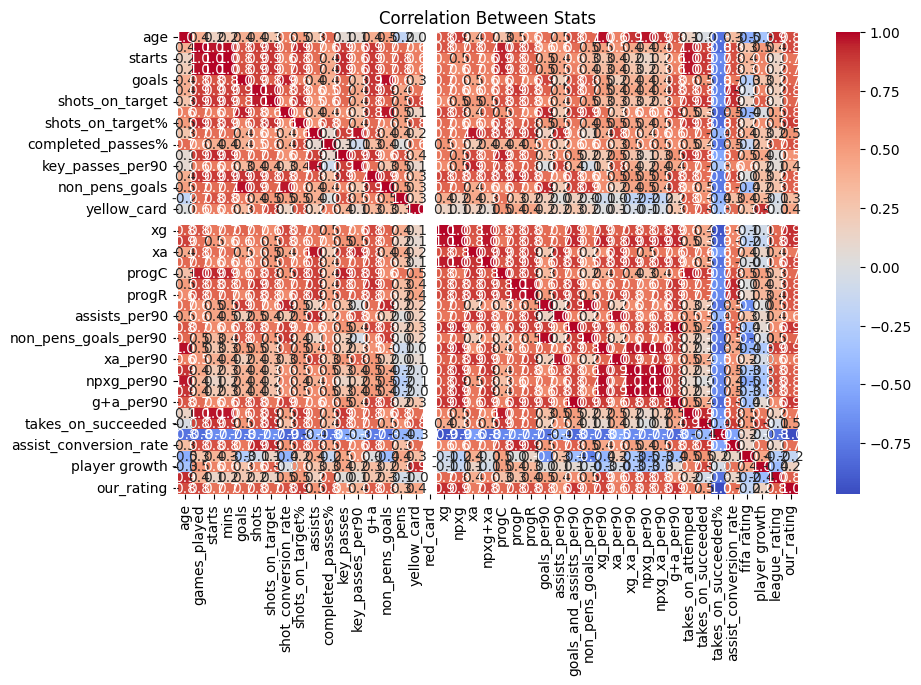

In [11]:

import seaborn as sns  

plt.figure(figsize=(10,6))
sns.heatmap(df_grouped.corr(), annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Between Stats")
plt.show()


In [12]:
best_season = df_grouped[["goals", "assists"]].sum(axis=1).idxmax()
print(f"best Brennan Johnson's season is: {best_season}")


best Brennan Johnson's season is: 2021-2022


([<matplotlib.axis.XTick at 0x231f29d03d0>,
 [Text(0, 0, '2019-2020'),
  Text(1, 0, '2020-2021'),
  Text(2, 0, '2021-2022'),
  Text(3, 0, '2022-2023'),
  Text(4, 0, '2023-2024'),
  Text(5, 0, '2024-2025')])

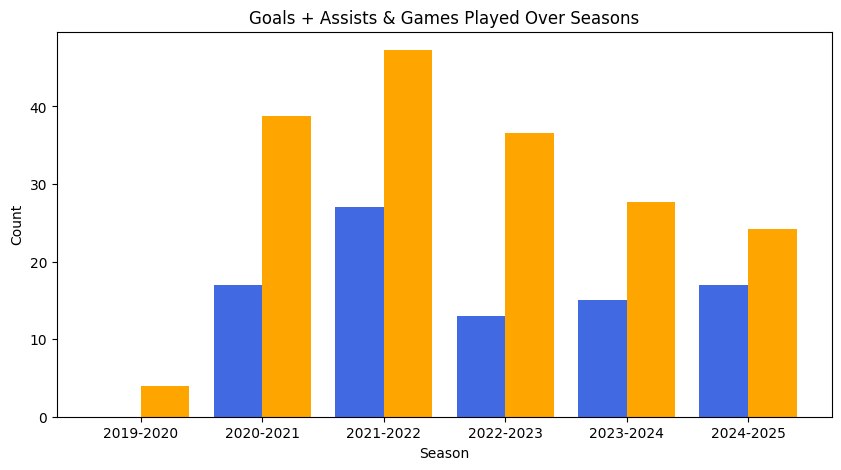

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df_grouped.index))  
width = 0.4  

plt.figure(figsize=(10, 5))

plt.bar(x - width/2, df_grouped["g+a"], width, label="Goals + Assists", color="royalblue")
plt.bar(x + width/2, df_grouped["mins"] / 90, width, label="Games Played", color="orange")

plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Goals + Assists & Games Played Over Seasons")
plt.xticks(x, df_grouped.index)


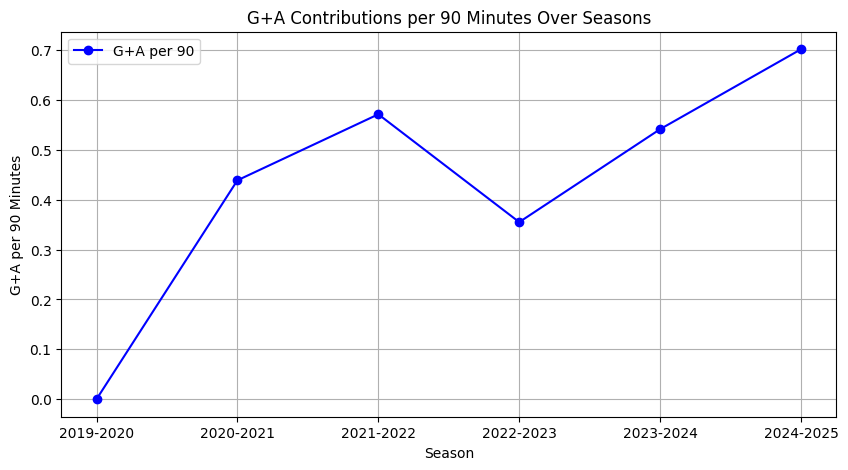

In [14]:

required_columns = ['season', 'g+a', 'mins']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    missing_columns
else:
    
    df['g+a_per90'] = df['g+a'] / (df['mins'] / 90)

    df_grouped2 = df.groupby('season', as_index=True)['g+a_per90'].mean()

    plt.figure(figsize=(10, 5))
    plt.plot(df_grouped.index, df_grouped2, marker="o", linestyle="-", color="b", label="G+A per 90")
    plt.xlabel("Season")
    plt.ylabel("G+A per 90 Minutes")
    plt.title("G+A Contributions per 90 Minutes Over Seasons")
    plt.legend()
    plt.grid(True)
    plt.show()

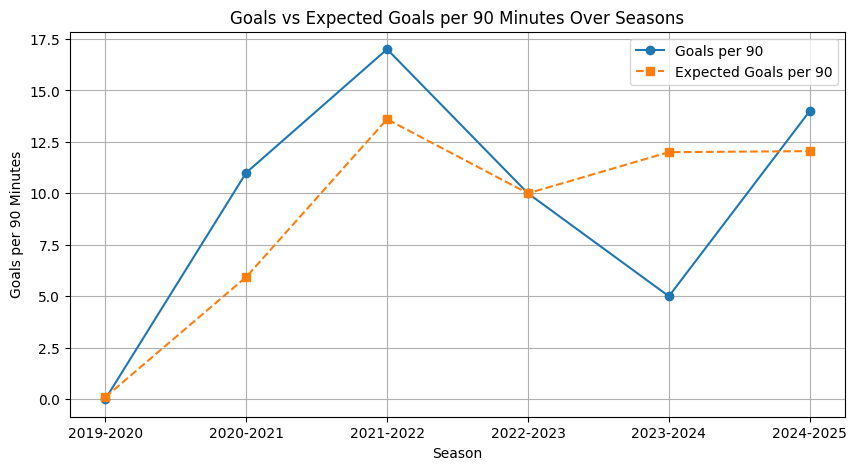

In [15]:
plt.figure(figsize=(10, 5))

plt.plot(df_grouped.index, df_grouped["goals"], marker="o", label="Goals per 90")
plt.plot(df_grouped.index, df_grouped["xg"], marker="s", linestyle="--", label="Expected Goals per 90")

plt.xlabel("Season")
plt.ylabel("Goals per 90 Minutes")
plt.title("Goals vs Expected Goals per 90 Minutes Over Seasons")
plt.legend()
plt.grid(True)

plt.show()


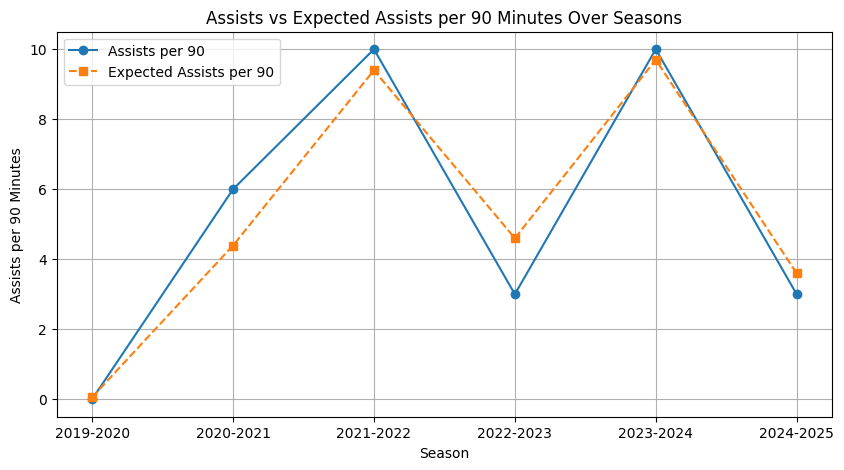

In [16]:
plt.figure(figsize=(10, 5))

plt.plot(df_grouped.index, df_grouped["assists"], marker="o", label="Assists per 90")
plt.plot(df_grouped.index, df_grouped["xa"], marker="s", linestyle="--", label="Expected Assists per 90")

plt.xlabel("Season")
plt.ylabel("Assists per 90 Minutes")
plt.title("Assists vs Expected Assists per 90 Minutes Over Seasons")
plt.legend()
plt.grid(True)

plt.show()

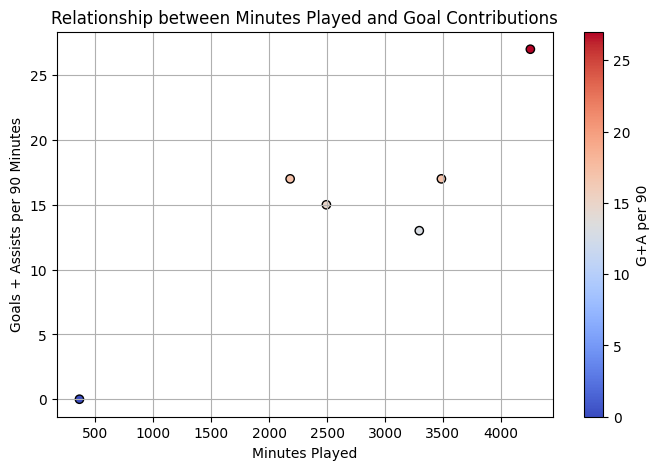

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(df_grouped["mins"], df_grouped["g+a"], c=df_grouped["g+a"], cmap="coolwarm", edgecolors="black")
plt.xlabel("Minutes Played")
plt.ylabel("Goals + Assists per 90 Minutes")
plt.title("Relationship between Minutes Played and Goal Contributions")
plt.colorbar(label="G+A per 90")
plt.grid(True)
plt.show()

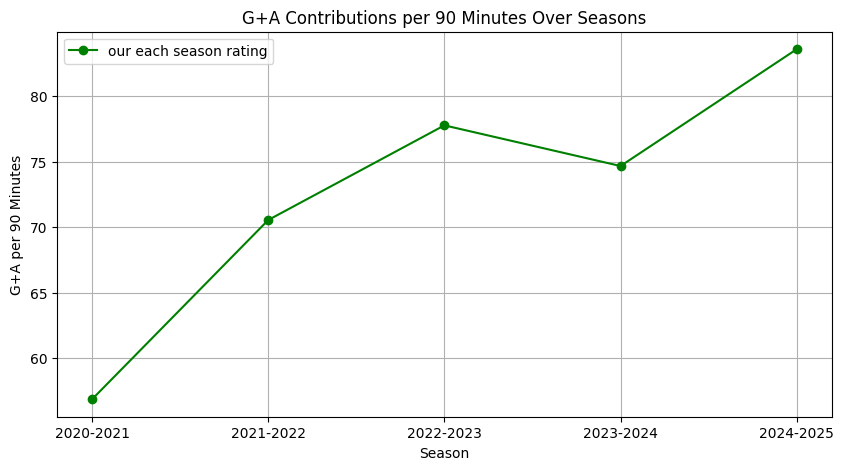

In [18]:

required_columns = ['season', 'our_rating']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    missing_columns
else:
    
    df['g+a_per90'] = df['g+a'] / (df['mins'] / 90)

    df_grouped2 = df['our_rating'].groupby(df['season']).mean()

    plt.figure(figsize=(10, 5))
    plt.plot(df_grouped.index, df_grouped2, marker="o", linestyle="-", color="g", label="our each season rating")
    plt.xlabel("Season")
    plt.ylabel("G+A per 90 Minutes")
    plt.title("G+A Contributions per 90 Minutes Over Seasons")
    plt.legend()
    plt.grid(True)
    plt.show()